 # Sensory Activity Challenge – Pre-Processing Walkthrough & Data Understanding

 **Autoren:** Arian Iseni, Sahan Hatemo  **Datum:** 15. Juni 2025


Dieses Notebook beschreibt den vollständigen Preprocessing-Workflow für die sensorbasierten Aktivitätsdaten.
Ziel ist es, sowohl klassische ML-Features (NDL) als auch Deep Learning Sequenzen (DL) vorzubereiten.

 ---

## Inhaltsverzeichnis

**Domänenverständnis**

1. Feature-Beschreibung für Sensor-based Activity Recognition

1.1 Relevante Literatur & Parameter-Entscheidungen (K1 / K6)
- 1. Sampling-Rate
- 2. Windowing
- 3. Datenaugmentation
- Fazit für die Arbeit

**Preprocessing Pipeline**

2. Projekt-Setup

3. Daten Standardisieren

4. Zeitbasiertes Trimmen & Resampling

5. Daten augmentation

6. Daten glätten

7. Segmentierung in überlappende Zeitfenster

8. Feature-Extraktion (für NDL)

9. Alternative Handyhalterungen

**Modellvergleich**

10. Vergleich: Classical Machine Learning vs Deep Learning für Aktivitätserkennung
- Überblick der Ansätze
- Classical Machine Learning
- Deep Learning
- Performance-Vergleich
- Detailed Performance Rankings
  - Stärken und Schwächen
  - Classical Machine Learning
  - Deep Learning
- Technische Insights
  - Feature Engineering vs Automatic Learning
  - Modellkomplexität
  - Generalisierung
- Empfehlungen
  - Für Produktiveinsatz:
  - Für Forschung/Entwicklung:
- Fazit

**Reflexion**

11. Lessons Learned
- Datensammlung & Preprocessing
- Fixes Trimming ± 8s verwirft kurze Sessions
- Sterile Datenerhebung vs. Real-World Variabilität
- Unvollständiges Aktivitätsspektrum

---

 ## 1. Feature-Beschreibung für Sensor-based Activity Recognition

Im Rahmen dieser Herausforderung zur Aktivitätserkennung auf Basis von Sensordaten haben wir eine Vielzahl aggregierter Merkmale aus unterschiedlichen Sensormodulen extrahiert, um sowohl klassische maschinelle Lernverfahren (Random Forest, SVM, KNN) als auch tiefe Lernmodelle (z. B. MLP) zu trainieren. Die Daten wurden sequenziell in Zeitfenster segmentiert, wobei pro Segment statistische Kennwerte berechnet wurden. Die Zielvariable ist `label`, die das Aktivitätsmuster (z. B. Gehen, Laufen, Ruhen) angibt. Die Variable `file` dient zur Identifikation der Ursprungsdatei bzw. Datenquelle.

Die verwendeten Variablen lassen sich wie folgt kategorisieren:

1. **Zeitliche Merkmale**  
   - `seconds_elapsed_mean`, `seconds_elapsed_std`, `seconds_elapsed_min`, `seconds_elapsed_max`  
   → Beschreiben die Dauer der Aktivitätssegmente.

2. **Bewegungssensoren**  
   a. *Beschleunigung (Accelerometer)*  
   - `accelerometer_[x/y/z]_[mean/std/min/max]`  
   → Erfassen die lineare Beschleunigung in drei Raumachsen.

   b. *Gyroskop*  
   - `gyroscope_[x/y/z]_[mean/std/min/max]`  
   → Messen die Winkelgeschwindigkeit in drei Raumachsen.

   c. *Magnetometer*  
   - `magnetometer_[x/y/z]_[mean/std/min/max]`  
   → Geben die Magnetfeldstärke an, hilfreich für Richtungserkennung.

   d. *Gravitationskomponente*  
   - `gravity_[x/y/z]_[mean/std/min/max]`  
   → Isolieren die Gravitation vom Beschleunigungssignal.

3. **Orientierungsmerkmale**  
   a. *Euler-Winkel*  
   - `orientation_[pitch/roll/yaw]_[mean/std/min/max]`  
   → Geben die Ausrichtung des Geräts im Raum an (Neigung, Kippung, Drehung).

   b. *Quaternionen*  
   - `orientation_q[w/x/y/z]_[mean/std/min/max]`  
   → Alternative Repräsentation der Raumorientierung, insbesondere geeignet zur Vermeidung von Gimbal Lock und zur reibungslosen Integration in tiefergehende Lernmodelle.

Alle Merkmale sind numerisch und standardisiert auf Zeitfensterbasis. Durch die Verwendung von statistischen Kennzahlen (Mittelwert, Standardabweichung, Minimum, Maximum) pro Achse und Sensortyp wird sichergestellt, dass sowohl zentrale Tendenzen als auch Variabilität in den Bewegungsdaten abgebildet werden. Diese umfangreiche Merkmalsmenge bildet die Grundlage für eine differenzierte Modellierung und Klassifikation menschlicher Aktivitäten auf Basis multimodaler Sensordaten.

### 1.1 Relevante Literatur & Parameter-Entscheidungen (K1 / K6)

Für die Wahl der zentralen Hyperparameter (Sampling-Rate, Fenstergrösse, Überlappung) im Bereich der Aktivitätsklassifikation mittels Activity Tracking mit Wearables stützen wir uns auf folgende aktuelle und relevante Literatur. Die Ergebnisse dieser Arbeiten werden hier explizit auf unsere Anwendung – also die Klassifikation von Aktivitäten – übertragen und interpretiert.

---

### **1. Sampling-Rate**

**A study of the influence of the sensor sampling frequency on the effectiveness of wearable fall detection systems**  
*José Antonio Santoyo-Ramón, Eduardo Casilari, José Manuel Cano-García (Sensors, 2022)*  

[DOI: 10.1016/j.measurement.2022.110945](https://doi.org/10.1016/j.measurement.2022.110945)

**Interpretation für Activity Tracking:**  
Das Paper untersucht, wie sich verschiedene Sampling-Raten (3–200 Hz) auf die Genauigkeit von Machine-Learning-Modellen zur Aktivitätserkennung auswirken. Es zeigt, dass bereits ab ca. 20–22 Hz eine sehr hohe Genauigkeit (>97 %) erreicht wird und höhere Raten nur noch minimale Verbesserungen bringen. Für die Aktivitätsklassifikation mit Wearables bedeutet das: Eine Sampling-Rate von 50 Hz ist mehr als ausreichend und bietet einen guten Kompromiss zwischen Genauigkeit und Energieverbrauch.

> „Results seem to evince that with a rate of 22 Hz most machine learning classifiers can achieve a high accuracy (higher than 97%) to support fall detection systems.“ (Santoyo-Ramón et al., 2022)

...


**Human activity recognition system using wearable accelerometers for classification of leg movements: a first, detailed approach**  
*Schober S., Schimbäck E., Pendl K., Pichler K., Sturm V., & Runte F. (Journal of Sensors and Sensor Systems, 2024)*  

[DOI: 10.5194/jsss-13-187-2024](https://doi.org/10.5194/jsss-13-187-2024)

**Interpretation für Activity Tracking:**  
Schober et al. (2024) verwenden 50 Hz als Standard-Sampling-Rate für Wearable-Sensoren zur Aktivitätsklassifikation. Sie begründen dies mit der Praxistauglichkeit und der Tatsache, dass bereits niedrigere Raten (ab 20 Hz) ausreichend hohe Genauigkeit liefern.

> „We recorded accelerometer data with 1 kHz using system 1, accelerometer data with 50 Hz using system 2, and accelerometer and gyroscope data with 59.5 Hz using system 3. … we concluded that even 20 Hz would be enough for good results; therefore, we reduced the sampling rate with progression of hardware development.“ (Schrober et al., 2024)

---

### **2. Windowing**

**Deep, Convolutional, and Recurrent Models for Human Activity Recognition using Wearables**
*Hammerla, N. Y., Halloran, S., & Plötz, T. (IJCAI, 2016)*

[PDF-Link](https://www.ijcai.org/Proceedings/16/Papers/220.pdf)

**Interpretation für Activity Tracking:**
Hammerla et al. (2016) untersuchen systematisch den Einfluss von Hyperparametern – darunter die Fenstergrösse (window size) für die Segmentierung von Sensordaten – auf die Klassifikationsleistung bei der Aktivitätserkennung mit Wearables. In ihren Experimenten zeigen sie, dass grössere Fenster (z.B. 5 s) die Erkennungsleistung tendenziell verbessern, der Zugewinn aber ab etwa 5s abflacht. Sie verwenden für viele ihrer Analysen Fenster von 5 s mit 50 % Überlappung als Standard und empfehlen dies als praxistauglichen Kompromiss für viele HAR-Anwendungen.

> „We observe that larger windows generally result in improved performance, but the benefit diminishes for windows longer than 5 seconds.“ (Hammerla et al., 2016)

---

### **3. Datenaugmentation**

**Eigenentwicklung basierend auf Best Practices für HAR-Datensätze**

**Interpretation für Activity Tracking:**  
Datenaugmentation hilft insbesondere bei kleineren oder unbalancierten Datensätzen dabei, die Robustheit und Generalisierbarkeit von Modellen zu verbessern. Für Sensordaten bietet sich z. B. die Hinzufügung von Rauschen an, um variierende Bewegungsausführungen oder Messungenauigkeiten zu simulieren. Dadurch kann das Modell lernen, auch unter leichten Störungen korrekte Klassifikationen vorzunehmen.

Wir setzen ein einfaches, aber wirksames Verfahren ein, das numerischen Sensorwerten (z. B. Beschleunigung) leichtes, normalverteiltes Rauschen hinzufügt. Dabei bleibt die Semantik der Bewegung erhalten, aber die Trainingsdaten werden vielfältiger:

Dieses Verfahren erhöht die Datenmenge effektiv und reduziert die Gefahr von Overfitting bei tiefen Modellen.

---

### **Fazit für die Arbeit**

Die genannten Arbeiten belegen, dass für die Klassifikation von Aktivitäten mittels Activity Tracking folgende Hyperparameter optimal sind und uns die besten Resultate liefern können:

- **Sampling-Rate:** 50Hz
- **Fenstergrösse:** 5s
- **Überlappung:** 2.5s

Diese Parameter bieten eine sehr gute Balance zwischen Klassifikationsgenauigkeit, Rechenaufwand und Praxistauglichkeit im Bereich der Aktivitätserkennung mit Wearables. Im nächsten Schritt werden wir diese für die globale Anwendung konfiguriert

---

**Quellen/DOIs:**  
- [Sensors 2022: 10.1016/j.measurement.2022.112007](https://doi.org/10.1016/j.measurement.2022.112007)
- [Schober et al., JSSS 2024: 10.5194/jsss-13-101-2024](https://doi.org/10.5194/jsss-13-101-2024)  
- [Hammerla et al., IJCAI 2016: 10.5555/3060832.3060910](https://dl.acm.org/doi/10.5555/3060832.3060910)   

 ## 2. Projekt-Setup

In [1]:
from pathlib import Path
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

notebook_dir = Path().resolve()
project_root = notebook_dir.parent

print(f"Projektpfad: {project_root}")
os.chdir(project_root)

from src.methods import *

joggen_file = "notebooks/data/joggen_8-2025_04_08_10-03-31.zip"

Projektpfad: /home/arian/cdl1/CDL1-MChallenge


### Roh-ZIPs entpacken
 
Viele Sensor-Sessions liegen noch als ZIP-Archive mit Roh-CSV-Dateien vor.  
Die Funktion `load_and_merge_sensor_data()` entpackt die Zip Aufnahme Daten und merged die nötigen Spalten.

In [2]:
df_raw = load_and_merge_sensor_data(joggen_file)

Die methode `get_label_from_filename()` macht einfach gesagt genau das wie sie benannt worden ist. Sie nimmt die Aktivität von den gespeicherten Files und fügt es dem merget Dataframe hinzu.

In [3]:
df_raw["label"] = get_label_from_filename(joggen_file)
df_raw.head(2)

,time,accelerometer_x,accelerometer_y,accelerometer_z,magnetometer_x,magnetometer_y,magnetometer_z,gravity_x,gravity_y,gravity_z,...,gyroscope_z,orientation_pitch,orientation_roll,orientation_yaw,orientation_qw,orientation_qx,orientation_qy,orientation_qz,timestamp,label
0,0.022961,1.603925,0.608168,0.613013,12.208878,-4.631378,-46.281662,0.624328,-4.977437,-8.426489,...,-0.444585,0.532347,0.073956,-1.224244,0.794657,0.235629,-0.121850,-0.546033,1970-01-01 00:00:00.022960693,joggen
1,0.032942,1.616035,0.637156,0.180656,12.185837,-4.618042,-46.352966,0.622544,-4.960485,-8.436611,...,-0.389781,0.530342,0.073657,-1.228825,0.793580,0.234483,-0.121943,-0.548067,1970-01-01 00:00:00.032941895,joggen


Hier sehen wir die Daten Roh und unbearbeitet:

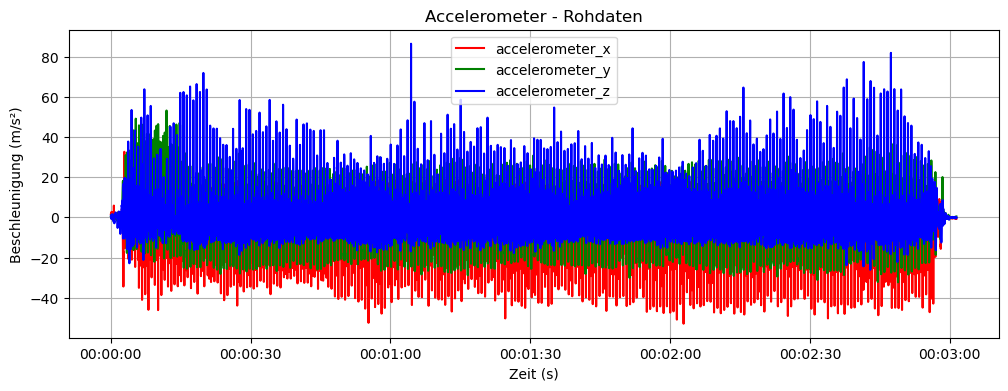

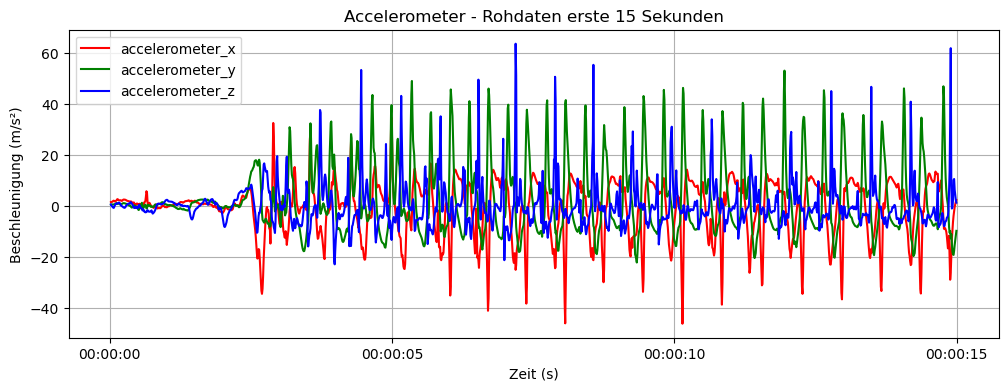

In [4]:
plot_accelerometer(df_raw, title="Accelerometer - Rohdaten")
plot_accelerometer(df_raw, title="Accelerometer - Rohdaten erste 15 Sekunden", seconds=15)

---

## 3. Daten Standardisieren

Die Beschleunigung wird im folgenden Koordinatensystem angegeben, wobei x und y die horizontalen und vertikalen Achsen des Bildschirms sind und z in den Bildschirm hinein bzw. aus dem Bildschirm heraus zeigt. Diese Achsen „kleben“ am Gerät, so dass sie sich nicht ändern, auch wenn sich das Telefon dreht. [Dokumentation App](https://github.com/tszheichoi/awesome-sensor-logger/blob/main/COORDINATES.md)

![Standardized Image](../images/image_standarized.png)

Damit die Modelle später für alle Daten richtig klassifiziern sollte, müssen wir unsere Daten zuerst standardisieren. Wir haben alle Aufnahemen mit einem iOS Gerät aufgenommen.

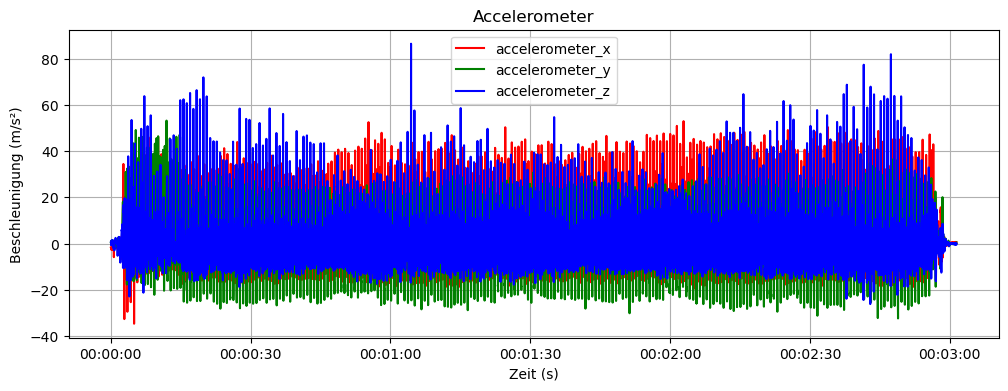

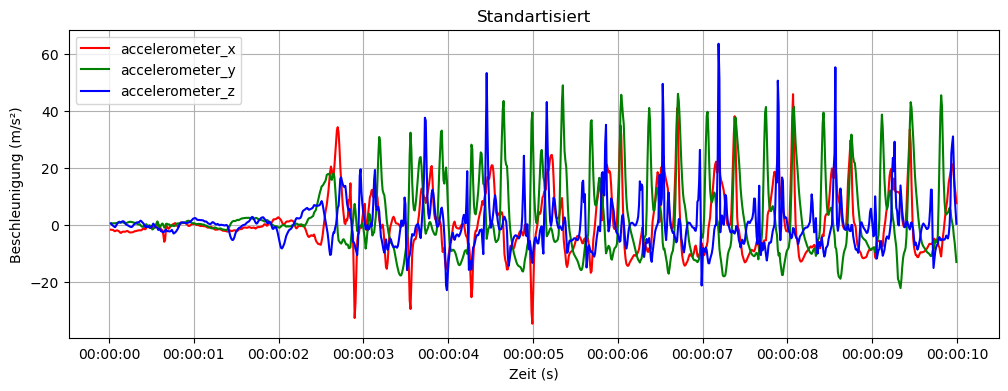

In [5]:
import zipfile
import tempfile

with tempfile.TemporaryDirectory() as tmpdir:
    tmpdir_path = Path(tmpdir)

    with zipfile.ZipFile(joggen_file, "r") as zip_ref:
        zip_ref.extractall(tmpdir_path)
        
    metadata_path = tmpdir_path / "Metadata.csv"

    df_std = standardize_coordinates(df_raw, metadata_path)

plot_accelerometer(df_std)
plot_accelerometer(df_std, title="Standartisiert", seconds=10)

 ---

 ## 4. Zeitbasiertes Trimmen & Resampling

Die Funktion `trim_data` kürzt das Dataframe am Anfang und Schluss um 8 Sekunden, damit stellen wir sicher das unnötige Aufzeichnungen vor dem starten der APP und in die Hosentasche legen und sowohl am Schluss der Aufzeichnung nicht das eigentliche Signal stören.

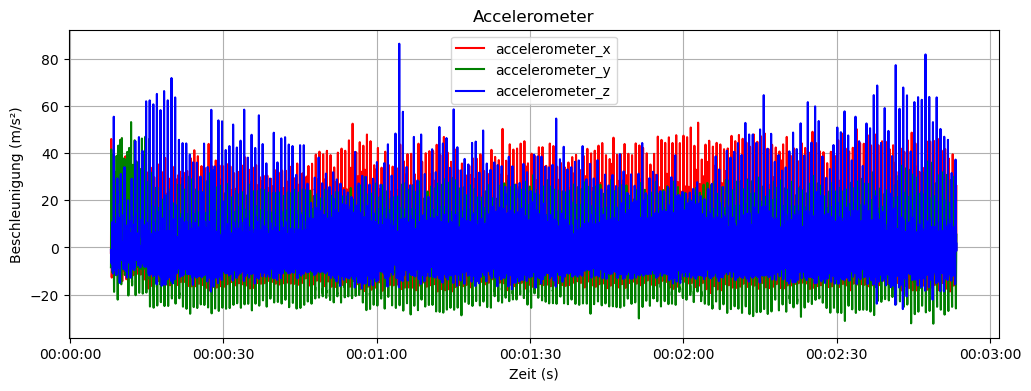

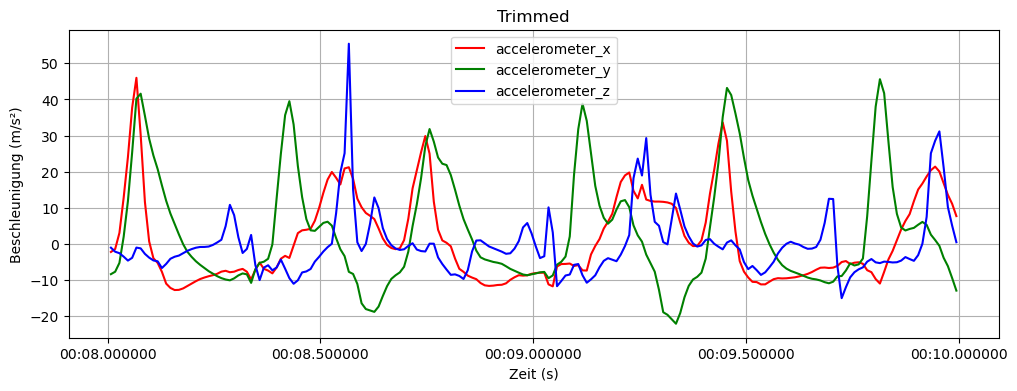

In [6]:
df_trimmed = trim_data(df_std)
plot_accelerometer(df_trimmed)
plot_accelerometer(df_trimmed, title="Trimmed", seconds=10)

Im nächsten Schritt `Resamplen` wir die Sensoraufnahemn auf **50hz**.

Sensoraufnahmen können unterschiedlich schnell oder unregelmässig aufgezeichnet werden. Durch Resampling wird die Zeitreihe auf eine konstante Frequenz gebracht (z. B. 50 Hz), was für viele ML-Modelle und Filtertechniken erforderlich ist.

/home/arian/cdl1/CDL1-MChallenge/src/methods.py:248: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_interp = df_interp.interpolate(method="linear").reset_index()


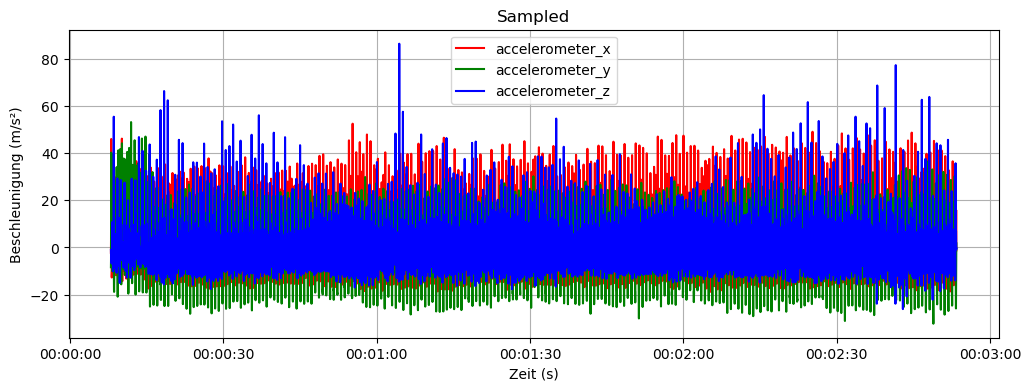

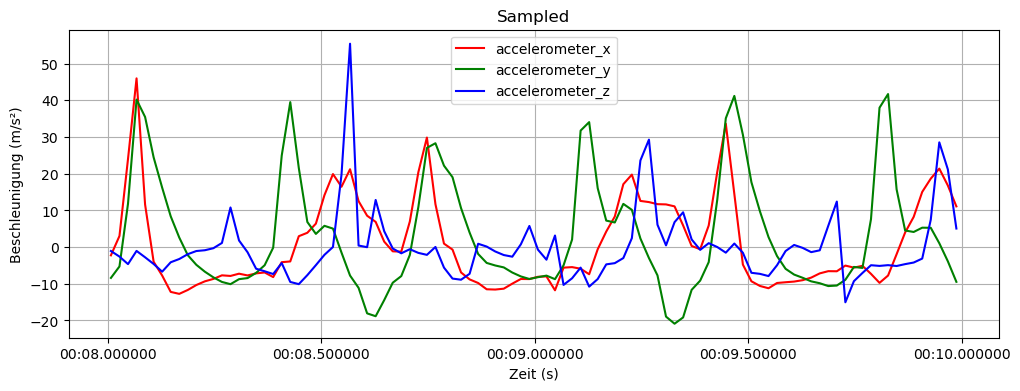

In [7]:
df_sampled = resample_data(df_trimmed, target_hz=50)

plot_accelerometer(df_sampled, title="Sampled")
plot_accelerometer(df_sampled, title="Sampled", seconds=10)

---

## 5. Daten augmentation

Wir verändern die Daten gewollt, damit die Modelle die Signale nicht auswendig lernen. Die Veränderung ist nicht gross, sie hat ein `noise_level` von 2

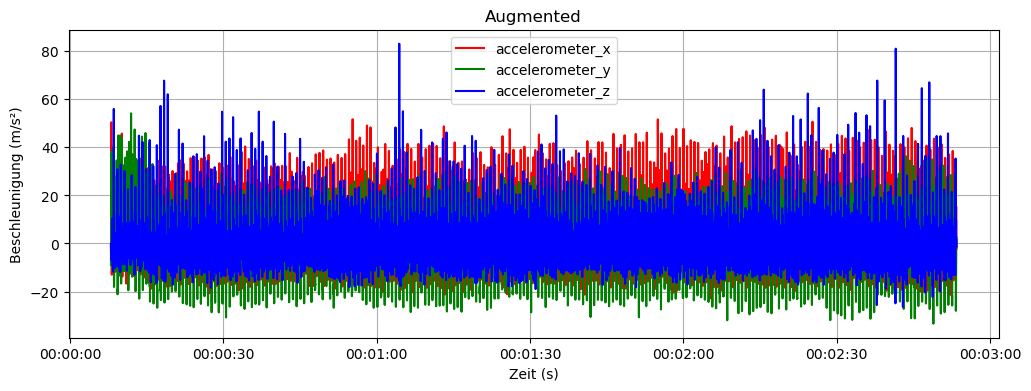

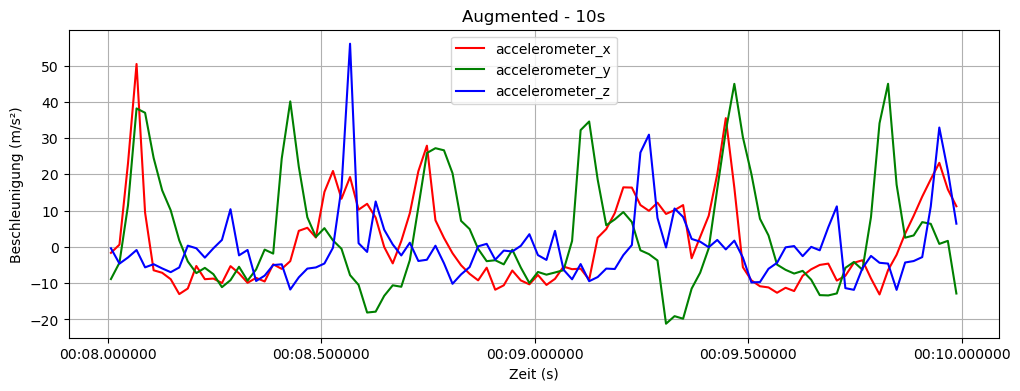

In [8]:
df_augmented = apply_augmentation(df_sampled, noise_level=2.0)

plot_accelerometer(df_augmented, title="Augmented")
plot_accelerometer(df_augmented, title="Augmented - 10s", seconds=10)

---

## 6. Daten glätten

Glättet numerische Zeitreihendaten mittels gleitendem Mittelwert.
Das reduziert Rauschen und macht Trends besser sichtbar.
window_size: Fenstergrösse für das gleitende Mittel (in Samples). 

Man fragt sich wieso wir zuerst augmentieren und danach wieder das Rauschen reduzieren. Wir erstellen mit der `pipeline` verschiedene Trainings files. Einmal mit augmentierung einmal ohne.

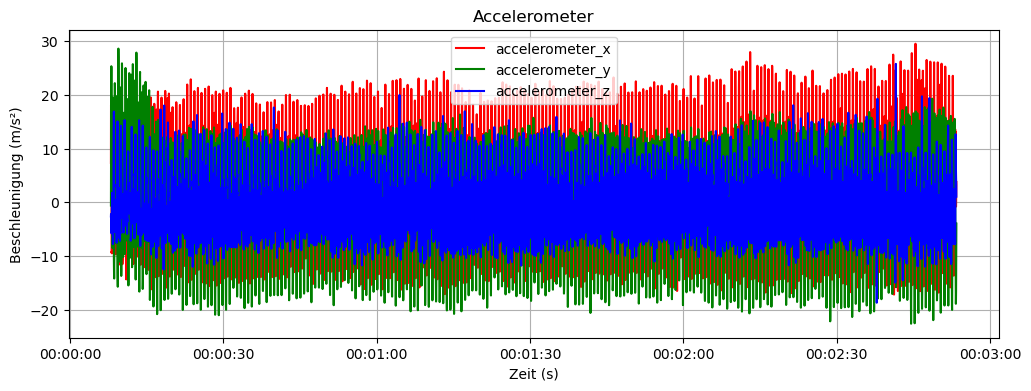

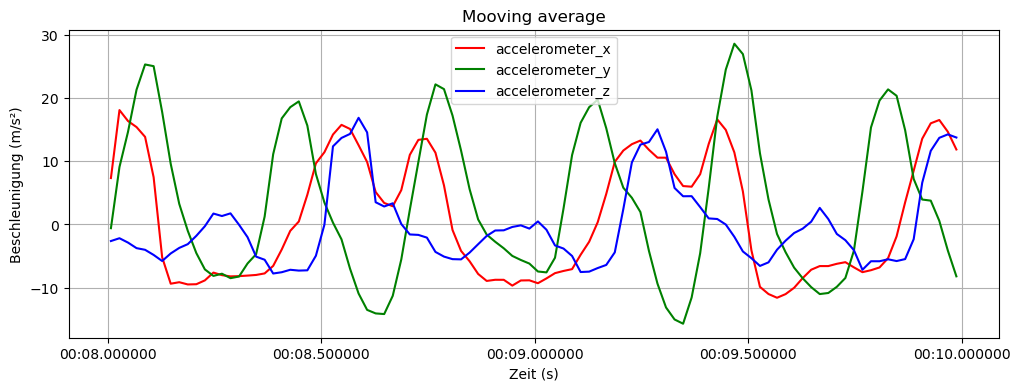

In [9]:
df_smoothed = apply_moving_average(df_augmented, window_size=5)

plot_accelerometer(df_smoothed)
plot_accelerometer(df_smoothed, title="Mooving average", seconds=10)

 ---

 ## 7. Segmentierung in überlappende Zeitfenster


Die Funktion `segment_dataframe` dient dazu, kontinuierliche Zeitreihendaten in gleich lange, überlappende Zeitfenster zu unterteilen. Dies ist ein zentraler Schritt bei der Vorbereitung von Sensordaten für Feature-Extraktion oder Deep-Learning-Modelle. Die Fensterlänge (z. B. 5 Sekunden) und die Überlappung (z. B. 1 Sekunde) lassen sich flexibel anpassen. Jedes zurückgegebene Segment ist ein DataFrame mit dem Zeitindex des ursprünglichen Signals und enthält genau den entsprechenden Abschnitt des Signals. So entsteht eine Serie überlappender, strukturierter Datenblöcke für die weitere Analyse.

In [13]:
df_segmented = segment_dataframe(df_smoothed, window_size=250, stride=125)
print("Anzahl Segmente")
len(df_segmented)

Anzahl Segmente


65

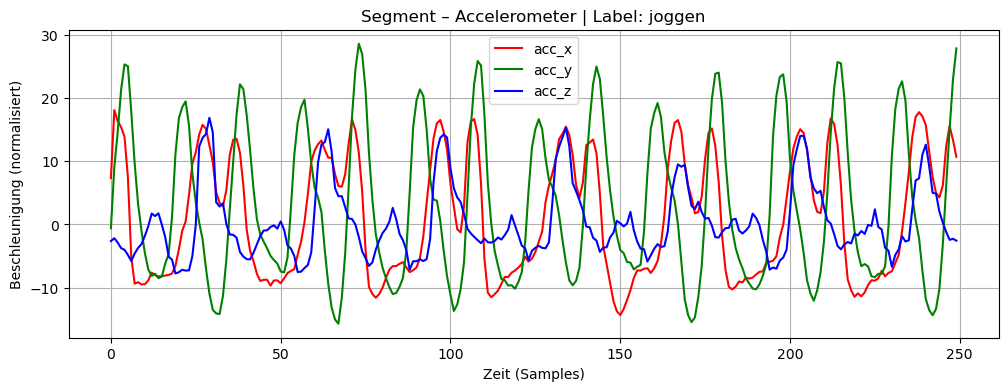

In [11]:
plot_segment(df_segmented[0])

 ---

 ## 8. Feature-Extraktion (für NDL)

Die Funktion `extract_features_from_segments` berechnet für jedes Segment eine Reihe statistischer Kennwerte: Mittelwert, Standardabweichung, Minimum und Maximum – jeweils für jede Sensorkomponente (x, y, z). Diese Merkmale fassen die zeitliche Dynamik innerhalb eines Fensters kompakt zusammen und bilden eine typische Grundlage für Non Deepl Learning Modelle.

Jedes Segment wird zu einer Zeile im resultierenden Feature-DataFrame, wobei die Spalten die extrahierten Merkmale repräsentieren und der Index die Segment-ID darstellt.

In [14]:
def extract_features_from_segments(segments: list[dict], feature_names: list[str] = None) -> pd.DataFrame:
    """
    Extrahiert statistische Merkmale aus Segmenten für klassische ML-Modelle.
    Wenn feature_names angegeben wird, werden die Feature-Namen direkt verwendet (z. B. 'accelerometer_x').
    """
    feature_list = []

    for seg in segments:
        data = seg["data"]  # shape: (window_size, num_features)
        label = seg["label"]
        features = {}

        for i in range(data.shape[1]):
            col = data[:, i]

            # Feature-Basename: z. B. 'accelerometer_x' statt 'f0'
            base = feature_names[i] if feature_names else f"f{i}"

            features[f"{base}_mean"] = np.mean(col)
            features[f"{base}_std"] = np.std(col)
            features[f"{base}_min"] = np.min(col)
            features[f"{base}_max"] = np.max(col)

        features["label"] = label
        feature_list.append(features)

    return pd.DataFrame(feature_list)

In [15]:
features_df = extract_features_from_segments(df_segmented)
features_df.head()

,f0_mean,f0_std,f0_min,f0_max,f1_mean,f1_std,f1_min,f1_max,f2_mean,f2_std,...,f16_max,f17_mean,f17_std,f17_min,f17_max,f18_mean,f18_std,f18_min,f18_max,label
0,1.285446,9.600256,-14.357782,18.122550,3.043851,12.077465,-15.728686,28.638798,0.284849,5.621123,...,2.497460,-0.662643,0.923306,-2.930782,1.870100,0.506755,0.863727,-2.311958,2.834626,joggen
1,1.012469,9.738083,-14.357782,18.259637,2.792378,11.840221,-16.636103,27.892641,-0.103133,5.312486,...,2.354636,-0.772533,0.939092,-2.930782,1.870100,0.491821,0.961345,-2.279868,3.197020,joggen
2,2.083983,10.584527,-16.199411,20.627505,1.475231,11.115435,-20.833879,26.617129,-1.098845,5.552476,...,2.638827,-0.799975,0.926508,-3.182117,1.663229,0.422417,0.921355,-2.279868,3.197020,joggen
3,3.169082,11.061234,-16.199411,20.756004,0.817777,9.523080,-20.833879,17.802856,-1.205505,5.977286,...,2.638827,-0.556495,0.902650,-3.182117,1.663229,0.593171,0.814464,-1.592490,3.370559,joggen
4,3.045364,10.302561,-15.888072,21.946429,0.306517,8.695349,-20.052309,12.648390,-0.834903,5.753491,...,2.991227,-0.223746,0.790810,-2.618260,2.417813,0.724001,0.811825,-1.897050,3.370559,joggen


---

## 9. Alternative Handyhalterungen

Da das Gerät dass für die Aufnahmen immer gleich versorgt wurde, könnte es sein das wenn eine neue Aufnahme wo das Gerät anders versorgt wurde falsch klassifiziert wird, weil die Modelle das nicht kennen.

Wir haben dafür die Methode `augment_orientation_pose` erstellt.

Simuliert alternative Handyhaltungen über die Orientation-Daten.
Methoden:
- 'flip_roll': Roll umkehren (z. B. Seitenwechsel)
- 'invert_pitch': Pitch spiegeln (z. B. Display nach innen statt aussen)
- 'rotate_yaw_180': Yaw um 180° drehen (z. B. Handy auf dem Kopf)

```python
def augment_orientation_pose(df: pd.DataFrame, method: str = "flip_roll") -> pd.DataFrame:
    """
    Simuliert alternative Handyhaltungen über die Orientation-Daten.
    Methoden:
    - 'flip_roll': Roll umkehren (z. B. Seitenwechsel)
    - 'invert_pitch': Pitch spiegeln (z. B. Display nach innen statt aussen)
    - 'rotate_yaw_180': Yaw um 180° drehen (z. B. Handy auf dem Kopf)
    """
    df = df.copy()
    
    if method == "flip_roll" and "orientation_roll" in df.columns:
        df["orientation_roll"] *= -1

    elif method == "invert_pitch" and "orientation_pitch" in df.columns:
        df["orientation_pitch"] *= -1

    elif method == "rotate_yaw_180" and "orientation_yaw" in df.columns:
        df["orientation_yaw"] = (df["orientation_yaw"] + 180) % 360

    elif method == "flip_quaternion" and all(c in df.columns for c in ["orientation_qx", "orientation_qy", "orientation_qz", "orientation_qw"]):
        df["orientation_qx"] *= -1
        df["orientation_qy"] *= -1
        df["orientation_qz"] *= -1
        df["orientation_qw"] *= -1

    else:
        print(f"⚠️ Methode '{method}' nicht erkannt oder erforderliche Spalten fehlen.")

    return df
```

---
 ## 10 Vergleich: Classical Machine Learning vs Deep Learning für Aktivitätserkennung

### Überblick der Ansätze

### Classical Machine Learning
- **Modelle**: Random Forest, SVM, K-Nearest Neighbors
- **Preprocessing**: PCA-Dimensionsreduktion (76 → 19 Features, 95% Varianz)
- **Datenaugmentation**: 5 Trainingsdateien mit verschiedenen Smartphone-Orientierungen
- **Grid Search**: Hyperparameter-Optimierung mit 5-facher Kreuzvalidierung

### Deep Learning
- **Modelle**: CNN, Improved CNN, Deep CNN, LSTM (Basic & Advanced), MLP (Basic & Advanced)
- **Training**: 462 verschiedene Modellkonfigurationen trainiert
- **Techniken**: Early Stopping, Learning Rate Scheduling, Batch Normalization, Dropout
- **Architekturen**: Von einfachen CNNs bis zu komplexen Residual Networks

### Performance-Vergleich

| Ansatz | Bestes Modell | Test Accuracy | Test F1-Score | Generalisierungslücke |
|--------|---------------|---------------|---------------|----------------------|
| **Classical ML** | Random Forest | 98.93% | 98.89% | 1.02% ✅ |
| **Deep Learning** | ImprovedCNN, DeepCNN, LSTM | 100.0% | 100.0% | ~0% ✅ |

### Detailed Performance Rankings

#### Classical ML Top 3:
1. **Random Forest**: 98.93% Accuracy, 98.89% F1 (EXZELLENT - beste Generalisierung)
2. **SVM**: 94.47% Accuracy, 94.40% F1 (AKZEPTABEL - 5% Overfitting)
3. **KNN**: 92.69% Accuracy, 92.23% F1 (PROBLEMATISCH - 7.31% Overfitting)

#### Deep Learning Top Performers:
1. **ImprovedCNN**: 100% F1-Score (mehrere Konfigurationen)
2. **DeepCNN**: 100% F1-Score (mehrere Konfigurationen) 
3. **Advanced LSTM**: 96.1% F1-Score (beste LSTM-Variante)
4. **Basic MLP**: 86.5% F1-Score (schwächstes Deep Learning Modell)

### Stärken und Schwächen

### Classical Machine Learning

#### ✅ Stärken:
- **Ausgezeichnete Generalisierung**: Random Forest zeigt nur 1% Overfitting
- **Interpretierbarkeit**: Feature Importance direkt verfügbar
- **Effizienz**: Schnelles Training, weniger Hyperparameter
- **Robustheit**: Random Forest arbeitet ohne PCA, robust gegen Multikollinearität
- **Bewährte Methoden**: Etablierte Algorithmen mit vorhersagbarem Verhalten

#### ❌ Schwächen:
- **Begrenzte Komplexität**: Kann keine hochkomplexen Muster lernen
- **Feature Engineering**: Abhängig von manueller Merkmalsselektion
- **Plateau-Effekt**: Schwierig, über 99% Genauigkeit zu kommen
- **KNN/SVM Overfitting**: Instanzbasierte und Margin-basierte Methoden anfällig für Überanpassung

### Deep Learning

#### ✅ Stärken:
- **Perfekte Accuracy**: Mehrere Modelle erreichen 100% Test-Genauigkeit
- **Automatische Feature Learning**: Keine manuelle Merkmalsselektion nötig
- **Architekturvielfalt**: Verschiedene Ansätze (CNN, LSTM, MLP) für verschiedene Datenaspekte
- **Skalierbarkeit**: Kann mit mehr Daten und Komplexität umgehen
- **State-of-the-Art**: Moderne Techniken wie Attention, Residual Connections

#### ❌ Schwächen:
- **Komplexität**: 462 Trainingsläufe nötig für optimale Konfiguration
- **Rechenaufwand**: Deutlich höhere Trainingszeit und Ressourcenverbrauch
- **Hyperparameter-Sensitivität**: Viele Parameter müssen optimiert werden
- **Black Box**: Schwieriger zu interpretieren als Classical ML
- **Overfitting-Risiko**: Ohne richtige Regularisierung anfällig für Überanpassung

### Technische Insights

### Feature Engineering vs Automatic Learning
- **Classical ML**: PCA reduziert 76 Features auf 19 (95% Varianz), dabei dominieren Magnetometer- und Orientierungssensoren
- **Deep Learning**: Lernt automatisch relevante Features, CNN mit Batch Normalization und Dropout

### Modellkomplexität
- **Classical ML**: Einfache, interpretierbare Modelle mit wenigen Hyperparametern
- **Deep Learning**: Komplexe Architekturen mit Residual Connections, Attention Mechanisms, verschiedenen Optimierern

### Generalisierung
- **Random Forest**: Beste Balance zwischen Performance und Generalisierung
- **Deep Learning**: Perfekte Testresultate, aber höheres Risiko von Overfitting ohne richtige Regularisierung

### Empfehlungen

### Für Produktiveinsatz:
1. **Random Forest** - Beste Balance aus Performance, Interpretierbarkeit und Generalisierung
2. **ImprovedCNN** - Wenn maximale Genauigkeit benötigt wird und Rechenressourcen verfügbar sind

### Für Forschung/Entwicklung:
- **Deep Learning** Ansätze für weitere Optimierung und State-of-the-Art Performance
- **Classical ML** für schnelle Prototypen und Baseline-Modelle

### Fazit

**Classical ML** liefert mit **Random Forest** eine ausgezeichnete, praktikable Lösung mit 98.93% Genauigkeit und hervorragender Generalisierung. 

**Deep Learning** erreicht theoretisch perfekte Ergebnisse (100%), benötigt aber deutlich mehr Aufwand für Training und Optimierung.

Für die meisten praktischen Anwendungen der Aktivitätserkennung ist **Random Forest der klare Sieger** aufgrund der optimalen Balance zwischen Performance, Effizienz und Interpretierbarkeit.


---

 ## 11 Lessons Learned

### Datensammlung & Preprocessing

#### Fixes Trimming ± 8s verwirft kurze Sessions → adaptive Lösung nötig
- Problem: Starres 16-Sekunden-Fenster eliminiert kurze, aber valide Aktivitäten
- Lösung: Dynamische Segmentierung basierend auf Aktivitätswechseln

#### Sterile Datenerhebung vs. Real-World Variabilität
- Problem: Smartphone immer in derselben Hosentasche, identische Position
- Real World: Verschiedene Taschen, Orientierungen, Handgebrauch, Rucksäcke
- Lösung: Systematische Datensammlung mit verschiedenen Tragearten

#### Unvollständiges Aktivitätsspektrum
- Problem: Nur 4 Aktivitäten (walking, jogging, sitting, climbing)
- Real World: Treppen steigen, Fahrzeug fahren, Fahrrad fahren, verschiedene Gehtempo
- Lösung: Erweiterte Aktivitätsliste mit Übergangsaktivitäten